# Temat: Gradient i pochodna
Opracowanie: A.Florkowska

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.ndimage as nd
from skimage import io
from skimage import color
import time
from IPython.display import Image

Image shape: (450, 280)
Image type: float64
Minimum value 0.0 and maximum value 1.0


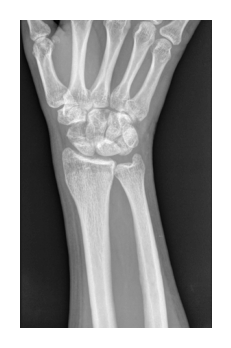

In [2]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) 
image = io.imread(".././images/example1.png")
image = image[:,:,0:3]
image = color.rgb2gray(image)
image = normalize(image)

print(f"Image shape: {image.shape}")
print(f"Image type: {image.dtype}")
print(f"Minimum value {np.min(image)} and maximum value {np.max(image)}")

plt.figure(figsize=(2, 2), dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Obraz jako macierz w Pythonie
Obraz to macierz. Analizując koordynaty pikseli korzystając z biblioteki Numpy, należy pamiętać, że pierwsza współrzędna to y (numer wiersza), a druga to x (numer kolumny). Środek układu współrzędnych zaczepiony jest w lewym, górnym rogu obrazu. Różnice pomiędzy kolumnami (x) daje informacje o różnicach horyzontalnych, natomiast różnice wertykalne to róźnice między rzędami (y).

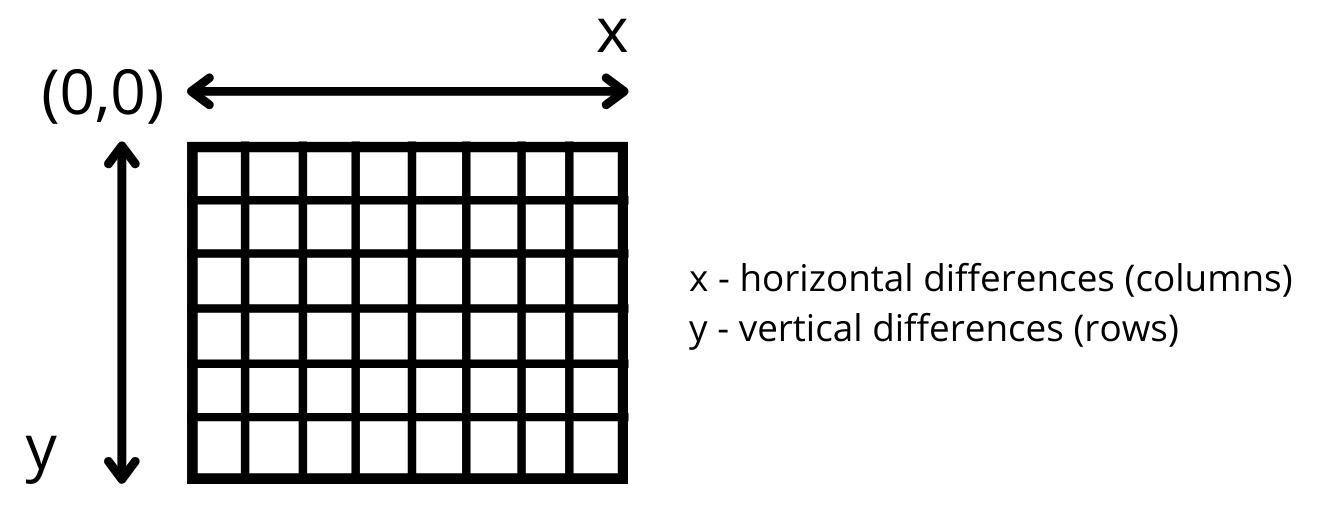

In [3]:
Image(filename=".././images/2_2.png", width=600)

# Pochodna
Zacznijmy od analizy funkcji jednej zmiennej. Pochodna takiej funkcji mówi o szybkości zmian wartości funkcji w porównaniu do zmian jej argumentów. Innymi słowy, pochodna funkcji w punkcie x równa się tangensowi kąta nachylenia stycznej do tej funkcji w tym punkcie x. Stycznia jest funkcja liniową, więc pochodna jest równa współczynnikowi kierunkowemu stycznej. O pochodnej możemy również pomyśleć jak o narzędziu do przybliżania kolejnego kroku funkcji, gdyż pochodna mówi o kierunku i szybkości wartości funkcji w małym przedziale wokół danego punktu. 

Całka jest pojęciem odwrotnym do pochodnej i oznacza pole powierzchni pod krzywą danego obszaru funkcji. Całka może byc interpretowana jako narzędzie do obliczania wartości funkcji na podstawie informacji o jej zmianach wartości w innych punktach.

Z kolei, druga pochodna funkcji mówi o tempie zmian szybkości zmiany funkcji w zależności od zmiany jej argumentu. 

Podsumowując, najprościej mówiąc:
1. Pochodna informuje nas o szybkości zmiany funkcji. Przykładowo: pochodna prędkości samochodu to jego przyśpieszenie (jak szybko zmienia sie prędkość w tym konkretnym momencie?), a pochodna drogi pokonanej przez samochód to jego prędkość (jak szybko pokonujemy kolejne odcinki drogi w tym konkretnym momencie?). 
2. Całka mówi nam o całkowitej ilości objętej przez te funkcję. Przykładowo: całka przyśpieszenie samochodu to jego prędkość (jaka jest prędkość jeśli na tym odcinku a-b przyśpieszenie wynosiło tyle?), a całka prędkości auto to pokonana przez nie droga (jaka całkowitą drogę pokonaliśmy jeśli jechaliśmy z taką prędkością na odcinku a-b).
3. Druga pochodna informuje o szybkości zmian pochodnej funkcji. Przykładowo, jeśli mamy drogę pokonaną przez samochód w jakiś czasie, to pierwsza pochodna funkcji powie nam o prędkości tego auta (czyli o szybkości zmiany drogi w czasie), zaś druga pochodna (pochodna prędkości to przyśpieszenie) powie o szybkości zmian tej prędkości w czasie: czy auto przyśpieszało (prędkość rosła), zwalniało (prędkość malała), czy pozostawało stałe (utrzymuje stałą prędkość).

Więcej można przeczytać tutaj: 
- https://www.matemaks.pl/pochodna-funkcji-w-punkcie.html
- https://www.korepetycje.plus/blog/matematyka-rachunek-rozniczkowy-omowienie-pojec-pochodnej-i-calki-zastosowanie-ich-w-zadaniach-praktycznych

# Gradient
W przypadku funkcji wielu zmiennych, mamy do czynienia z gradientem, czyli wektorem zawierającym informację o pochodnych cząstkowych funkcji (dla każdej zmiennej). W efekcie gradient tworzy pole wektorowe wskazujące kierunki najszybszych wzrostów wartości danego pola skalarnego w poszczegolnych punktach. Moduł takiego wektora (jego długość) jest równy szybkości wzrostu pola skalarnego w kierunku najwiekszego wzrostu. 

Patrząc na poniższy obrazek, można to sobie wyobrazić jako nachylenie stoku: ciemno znaczy wyżej, białe znaczy niżej. Im stok jest bardziej stromy w danej lokalizacji, tym szybciej zmienia się wysokość w tym kierunku. Na rysunku po lewej mamy górę po środku, o równomiernym nachyleniu z każde ze stron, natomiast po prawej mamy nachylenie narastające równomiernie od prawej do lewej.

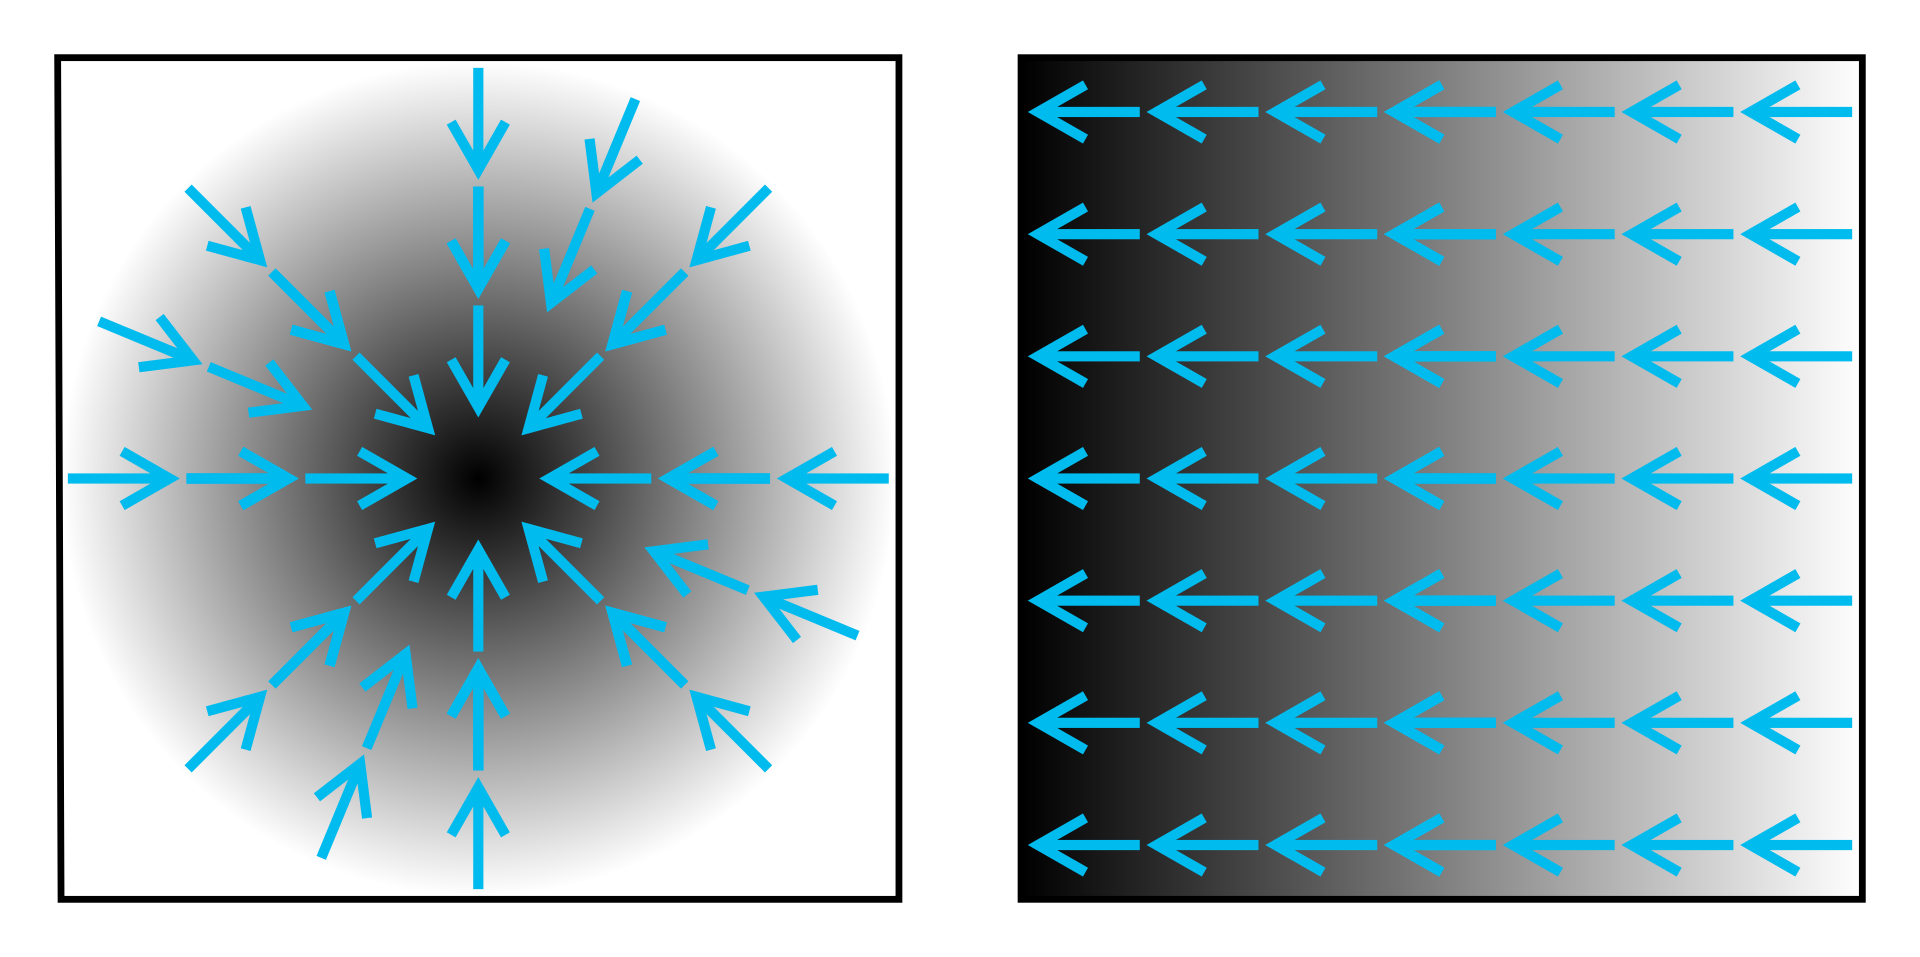

In [4]:
Image(filename=".././images/2_1.png", width=500)
# Source: https://pl.wikipedia.org/wiki/Gradient_(matematyka)

Tak jak ustaliliśmy wcześniej, obraz to funkcja wielu zmiennych. Skoro gradient pokazuje szybkość i kierunek zmian takich funkcji, to znaczy, że w przypadku obrazów uwykupla miejsca o dużej różnicy intensywności między dwoma pikselami/wokselami. 

Zastanów się: kiedy możemy się spotkać z taką sytuacją, że piksele obok siebie znacznie różnią się wartością? 
Np. w przypadku obrazów w skali szarości, jeśli obok siebie znajduje się biały i czarny piksel/woksel (jasny / ciemny). Zazwyczaj takie miejsca to krawędzie czyli miejsca o gwałtowej zmianie intensywności. Czyli innymi słowym, gradient może posłużyć do wyznaczania konturów na obrazie, a dodatkowo samemu można zdefiniować jak wyraźne kontury chcemy wykryć (róźnica w intensywności). Jedynym wymogiem jest to, aby na początku przekonwertować obraz do skali szarości.  

Gradient daje informację o szybkości i kierunku zmian dla każdej zmiennej. W przypadku obrazów, jest to gradient wzdłuż osi x i y, czyli pochodne cząstkowe x i y. Mówią one kolejno o zmianach horyzontalnych i wertykalnych. Kąt (kierunek zmiany) i magnituda (wartość szybkości zmiany) gradientu definiowane są poniższymi wzorami:

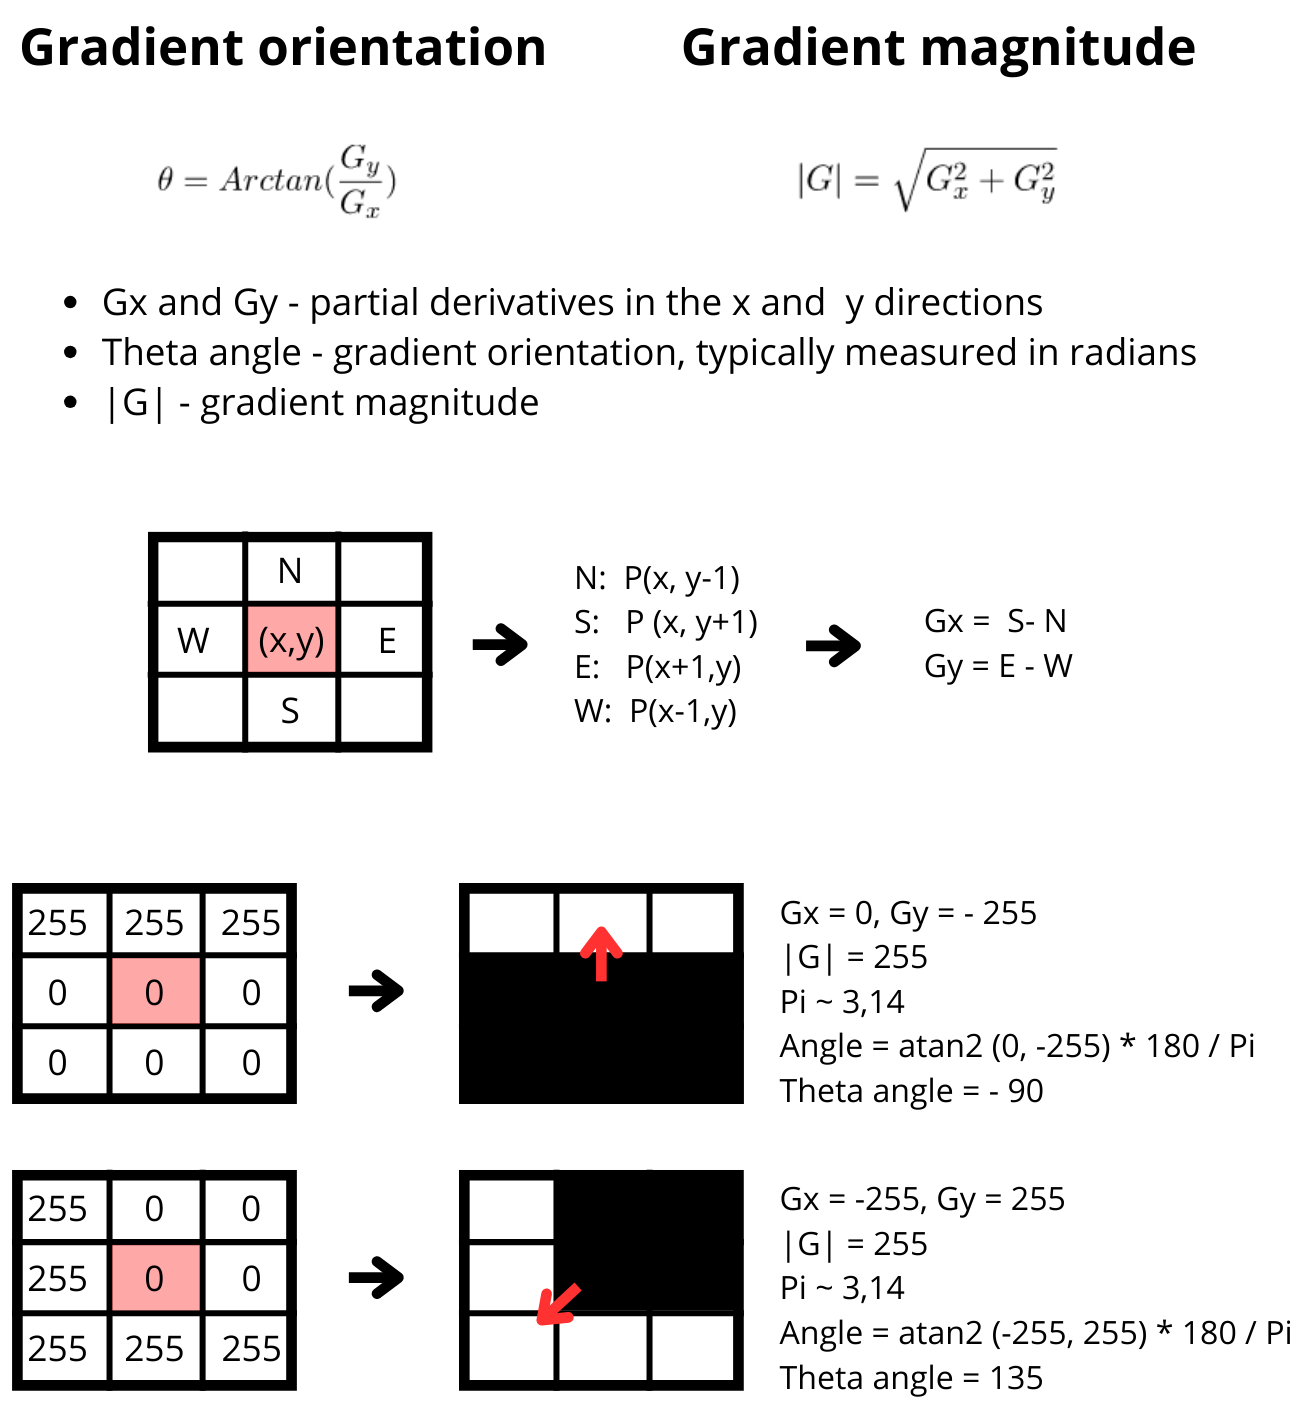

In [5]:
Image(filename=".././images/2_3.png", width=500)

Aby jeszcze lepiej zrozumieć pojęcie gradientu, polecam zapoznać się z poniższym artykułem: 
- https://pl.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/the-gradient
- https://www.baeldung.com/cs/gradient-orientation-magnitude

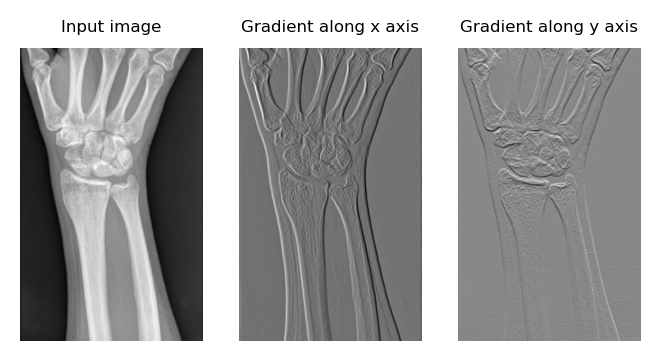

In [6]:
gradient_y, gradient_x = np.gradient(image)

plt.figure(figsize=(4, 2), dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Input image", fontsize=6)
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.title("Gradient along x axis", fontsize=6)
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.title("Gradient along y axis", fontsize=6)
plt.show()

# Rodzaje gradientu
Wyróżniamy kilka rodzajów gradientu, wyrażane poniższymi wzorami:
- przedni (froward)
- wsteczny (backward)
- centralny (central)

Gradientu wstecznego nie jesteśmy w stanie policzyć dla rzędu i kolumny o indeksie 0 (pierwsze). Z kolei gradientu przedniego nie możemy policzyć dla ostatniego rzędu i kolumny. Gradient centralny policzymy dla każdego innego elementu macierzy. Jedynie jest to niemożliwe podczas obliczeń w czasie rzeczywistym, gdy nie znamy danych z kolejnej chwili czasowej (wtedy liczymy tylko gradient w tył).

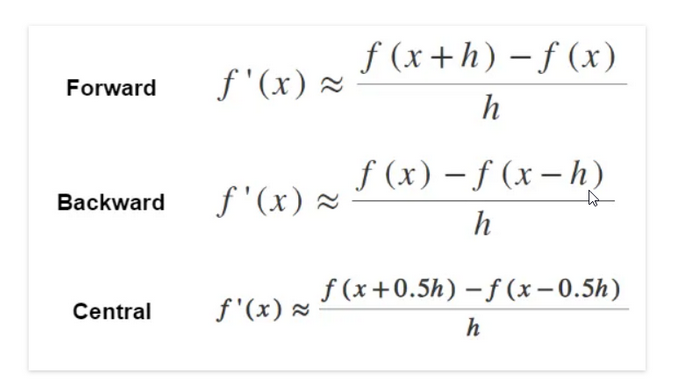

In [7]:
Image(filename=".././images/2_4.png", width=400)

In [8]:
# There are many possibilities to implement gradient funtion: 
def our_gradient_boundaries(image):
  gradient_y = np.zeros(image.shape)
  gradient_x = np.zeros(image.shape)
  # Assuming h = 1
    # Central
  gradient_y [1:-1, : ] = (image[2:,:] - image[0:-2,:]) /2
  gradient_x [ :, 1:-1 ] = (image[:,2:] - image[:,0:-2]) /2
    # Forward
  gradient_y[0,:] = (image[1,:] - image[0,:])/1
  gradient_x[:,0] = (image[:,1] - image[:,0])/1
    # Bacward
  gradient_y[-1,:] = (image[-1, :] - image[-2,:])/1
  gradient_x[:,-1] = (image[:, -1] - image[:,-2])/1

  return gradient_y, gradient_x

def our_gradient_loops(image):
  gradient_y = np.zeros(image.shape)
  gradient_x = np.zeros(image.shape)
  # Assuming h = 1
  for i in range (0,image.shape[0]): 
    for j in range (0,image.shape[1]): 
        if (i == 0):
            gradient_y[i,j] = (image[i+1,j] - image[i,j])/1
        if (j == 0):
            gradient_x[i,j] = (image[i,j+1] - image[i,j])/1
        if (i == (image.shape[0] - 1)):
            gradient_y[i,j] = (image[i,j] - image[i-1,j])/1
        if (j == (image.shape[1] - 1)):
            gradient_x[i,j] = (image[i,j] - image[i,j-1])/1
        if (i != 0 and j != 0 and i != (image.shape[0] - 1) and j != (image.shape[1] - 1)):
            gradient_y [i,j ] = (image[i+1,j] - image[i-1,j]) /2
            gradient_x [ i,j ] = (image[i,j+1] - image[i,j-1]) /2
  return gradient_y, gradient_x

Our gradient without loops - time:  0.003000497817993164
Our gradient with loops - time:  0.13942956924438477


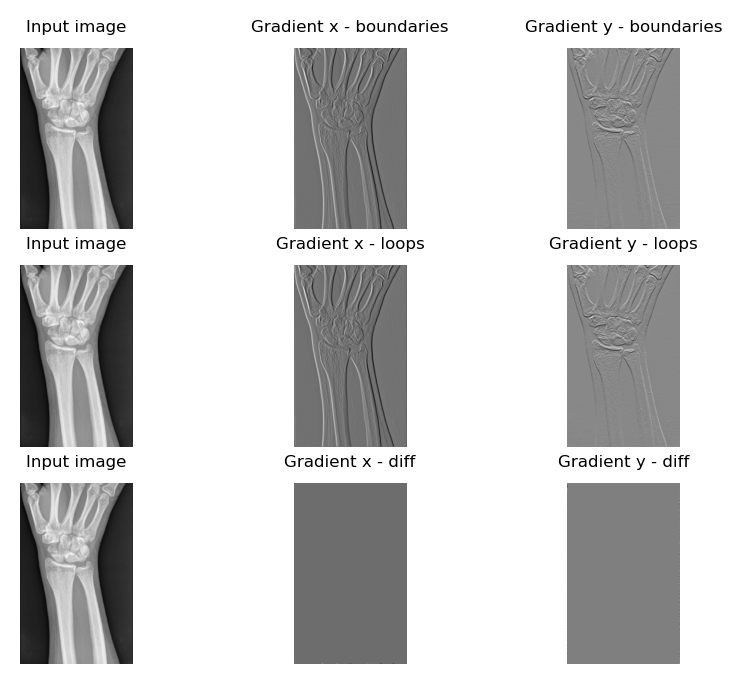

In [9]:
start = time.time()
gradient_boundaries_y, gradient_boundaries_x = our_gradient_boundaries(image)
end = time.time()
print("Our gradient without loops - time: ", end - start )
start2 = time.time()
gradient_loops_y, gradient_loops_x = our_gradient_loops(image)
end2 = time.time()
print("Our gradient with loops - time: ", end2 - start2 )

diff_x = gradient_boundaries_x - gradient_loops_x
diff_y = gradient_boundaries_y - gradient_loops_y

plt.figure(figsize=(5, 4), dpi=200)
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 2)
plt.imshow(gradient_boundaries_x, cmap='gray')
plt.title("Gradient x - boundaries", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 3)
plt.imshow(gradient_boundaries_y, cmap='gray')
plt.title("Gradient y - boundaries", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 4)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 5)
plt.imshow(gradient_loops_x, cmap='gray')
plt.title("Gradient x - loops", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 6)
plt.imshow(gradient_loops_y, cmap='gray')
plt.title("Gradient y - loops", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 7)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 8)
plt.imshow(diff_x, cmap='gray')
plt.title("Gradient x - diff", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 9)
plt.imshow(diff_y, cmap='gray')
plt.title("Gradient y - diff", fontsize=6)
plt.axis('off')
plt.show()

Jak można zaobserwować liczenie gradientu przez pętle jest 100x dłuższe niż korzystanie z indeksowania - dlatego jest ono zalecane. Różnice pomiędzy obliczonymi naszymi gradientami (diff x i diff y) oznaczają, że obie metody uzyskały takie same wyniki. 

# Konwolucja (splot) vs korelacja
Są to operacje matematyczne, które umożliwiają wydobyć pewne informacje z sygnału. Mamy sygnały 1-wymiarowe, 2-wymiarowe (2D, czyli np. obrazy) itd. 
Najintuicyjne wytłumaczenie obu pojęć to dla mnie:
- konwolucja (splot) - służy do "połączenia" dwóch funkcji, w efekcie czego możemy sprawdzić jak jeden sygnał wpłynął na drugi. Przykładowo. jaka jest odpowiedź obiektu na dany sygnał wejściowy. 
- korelacja - służy do pomiaru podobieństwa między dwoma sygnałami / sekwencjami, w efekcie możemy sprawdzić czy jeden sygnał zawiera cechy drugiego.

Jeśli chodzi o sygnały 2D, czyli obrazy, do operacji używa się specjalnych masek (= kerneli), które są dwuwymiarowymi macierami o określonym wymiarze.
Przy obu operacjach, maska przesuwa sie po pierwotnym obrazie (sygnale) wykonując obliczenia matematyczne, a wynikowa wartość zapisywana jest do nowego sygnału (nowa macierz = obraz). Ważne jest, że środek maski (= jądro maski) nakładany był na interesujący nas piksel / woksel, i to odpowiadającemu mu pikselowi / wokselowi w nowym obrazie przypisujemy obliczoną wartość. Ale w jaki sposób obliczana jest wynikowa wartość? Już spieszę z odpowiedzią - odpowiadające sobie wartości mnożymy przez siebie a całość następnie sumujemy, co można zaobserwować na poniższym rysunku. 

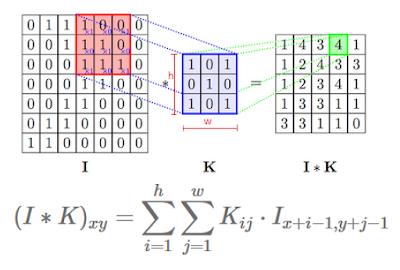

In [10]:
Image(filename=".././images/2_5.png", width=400)
# Source: http://sciagaprogramisty.blogspot.com/2018/01/konwolucja-wstep-do-neuronowych-sieci.html

Zaraz, zaraz - ale co z pikselami z pierwszego (o indeksie 0) oraz ostatniego rzędu i kolumnny (zakładając rozmiar maski 3x3). Przecież jeśli na nie nałożymy jądro maski to niektóre jej elementy, nie będą miały wartości odpowiadających. Zgadza się - to problem brzegowy. Jeśli byśmy pominęli te 'problematyczne' wiersze i kolumny, to zauważ że obraz wynikowy byłby mniejszy niż oryginalny. Inną opcją jest sztuczne zwiększenie obrazu poprzez dodanie obramówki. Może być ona wypełniona 0, lub średnią / medianą pikseli otaczających. Ważne jest, że teraz obraz wejściowy i wyjściowy będą tego samego rozmiaru. Możesz się teraz zastanowić, skąd masz wiedzieć JAK DUŻA powinna być ta obramówka. Zauważ, że jest to zależne od rozmiaru zastosowanej maski, która co do reguły zazwyczaj ma nieparzyste wymiary. Wtedy obramówka z każdej ze stron, powinna być równa zaokrąglonej w dół, wielkości połowy maski. Przykładowo: maska ma rozmiar 5x5, to wtedy obramówka powinna być równa 5/2 = 2.5, czyli 2. 

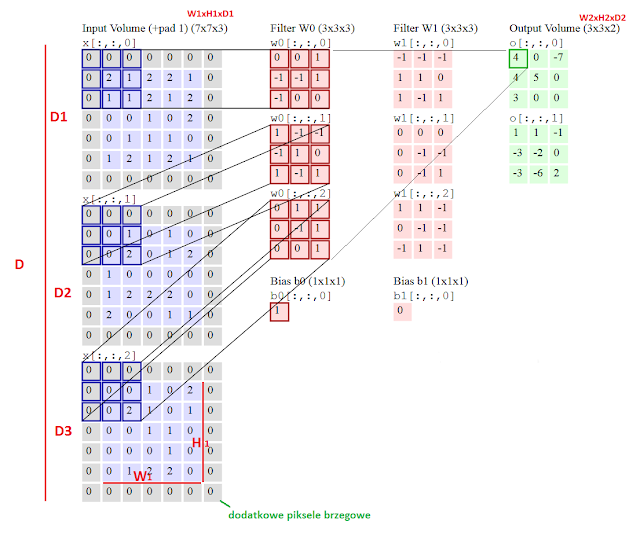

In [11]:
Image(filename=".././images/2_6.png", width=400)
# Source: http://sciagaprogramisty.blogspot.com/2018/01/konwolucja-wstep-do-neuronowych-sieci.html

Z matematycznego punktu widzenia, podczas operacji konwolucji drugi sygnał zostaje odwrócony, czyli nakładany jest odwrócony drugi sygnał na pierwszy z nich. W przypadku korelacji używamy obu pierwotnych sygnałów. 

Jednakże dalej pozostaje pytanie: dlatego sygnał zostaje odwrócony podczas operacji konwolucji?
Weźmy sobie dwa sygnały: A i B i założmy, że sygnał A to sygnał wejściowy a sygnał B to system. Naszym celem jest zbadanie odpowiedzi (sygnał C) naszego systemu (sygnał B) na jakis sygnał wejściowy (sygnał A). Na każdą próbkę z sygnału A oddziałowuje sygnał B. W efekcie otrzymujemy wynikowy sygnał C, będący sumą tych oddziałowywań. Co więcej, podczas analizy należy pamietać o zasadzie: że na aktualnie badaną próbkę w sygnale, mają wpływ poprzednie próbki tego sygnału. Aby matematycznie wszystko się zgadzało, należy więc dlatego obrócić ten sygnał. Świetnie wizualnie jest to pokazane tutaj: https://www.youtube.com/watch?v=RmePGKWOSMQ. Dodatkowo polecam także tem materiał, tłumaczący konwolucję w bardzo intuicyjny, praktyczny sposób na przykładzie roweru i gróskiej drogi: https://www.youtube.com/watch?v=x3Fdd6V_Hok.

Świadomość tej różnicy jest kluczowa, jeśli stosujemy obie operacje matematyczne. Gdy drugi sygnał jest symetryczny, nie ma żadnej różnicy (sygnał pierwotny i odwrócony są takie same). Gdy sygnał jest jednak niesymetryczny, to wyniki są całkowicie inne, więc warto o tym pamiętać. 

Warto zapoznać się z tym:
- Wytłumaczenie zagadnienia konwolucji i sposóbu obliczania wartości: http://sciagaprogramisty.blogspot.com/2018/01/konwolucja-wstep-do-neuronowych-sieci.html
- Wykład Profesora G. Jensena o różnicy między korelacją a konwolucją: https://www.youtube.com/watch?v=MQm6ZP1F6ms 

# Dane medyczne - rzeczywisty dobór rozmiaru maski
Anizotropy charakter danych ma kluczowy wpływ na dalsze przetwarzanie obrazów np. obliczania gradientu lub określania wymiarów maski do filtracji. Wszystkie parametry reprezentujące wymiary przestrzenne należy podawać w jednostkach fizycznych, a dopiero w trakcie przetwarzania konwertować je na jednostki reprezentowane w pikselach/wokselach. Przykładowo, mamy dane z CT o wymiarze woksela o wymiarze (1mm, 1mm, 2mm), które chcemy przefiltrować izotropowym filtrem uśredniającym o wymiarze (6mm,6mm,6mm). W tym wypadku powinniśmy użyć maski o wymiarze (6,6,3).  

# Maska gradientu
Zastanówmy się w takim razie, jak może wyglądać maska do obliczenia gradientu centralnego. W takim wypadku jest to różnica próbki następującą i poprzedzającej badany piksel. Z tego wynika, że próbka następująca ma mieć znak dodatni, a poprzedzająca ujemny. Jak można również zauważyć zastosowanie operacji konwolucji i korelacji z tą niesymetryczną maską gradientową spowodowało uzyskanie różnych wyników, gdyż operacja konwolucji zmieniła kolejność zmian.

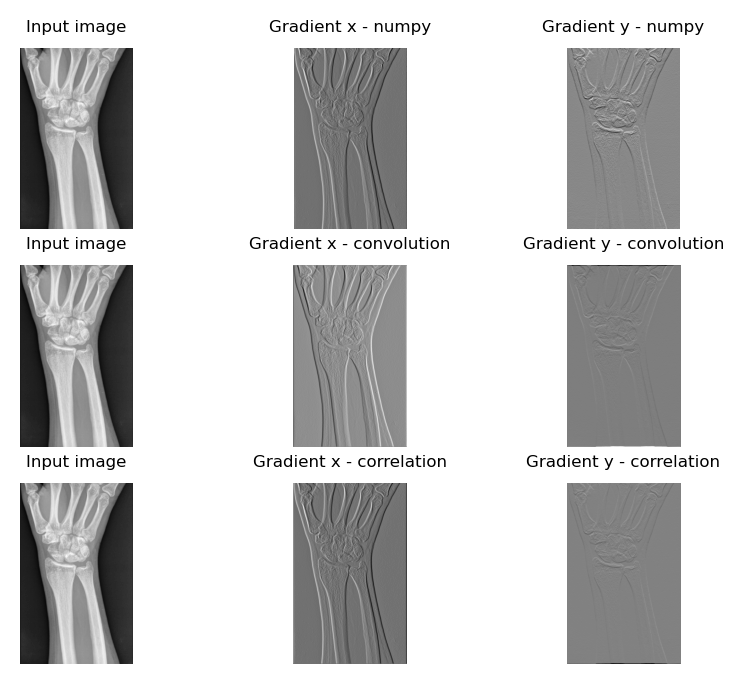

In [12]:
def our_gradient_correlation(image):
  window_x = np.array([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x) / 2
  gradient_y = signal.correlate2d(image, window_y) / 2
  return gradient_y, gradient_x

def our_gradient_convolution(image):
  window_x = np.array([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]                     
  ])
  window_y = window_x.T
  gradient_x = signal.convolve2d(image, window_x) / 2
  gradient_y = signal.convolve2d(image, window_y) / 2
  return gradient_y, gradient_x
    
gradient_corr_y, gradient_corr_x = our_gradient_correlation(image)
gradient_conv_y, gradient_conv_x = our_gradient_convolution(image)

plt.figure(figsize=(5, 4), dpi=200)
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.title("Gradient x - numpy", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.title("Gradient y - numpy", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 4)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 5)
plt.imshow(gradient_conv_x, cmap='gray')
plt.title("Gradient x - convolution", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 6)
plt.imshow(gradient_conv_y, cmap='gray')
plt.title("Gradient y - convolution", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 7)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 8)
plt.imshow(gradient_corr_x, cmap='gray')
plt.title("Gradient x - correlation", fontsize=6)
plt.axis('off')
plt.subplot(3, 3, 9)
plt.imshow(gradient_corr_y, cmap='gray')
plt.title("Gradient y - correlation", fontsize=6)
plt.axis('off')
plt.show()

# Magnituda i orientacja gradientu
Na samym początku zostały przedstawione wzory na obliczenie magnitudy i orientacji gradientu. Mapa cieplna pokazuje, które które fragmenty zdjęcia cechują się jakimi wartościami kątów: od ujemnych do dodatnich.

C:\Users\agnie\AppData\Local\Temp\ipykernel_8888\2272797025.py:4: RuntimeWarning: divide by zero encountered in divide
  gradient_angle = lambda gradient_x, gradient_y: np.arctan(gradient_y/gradient_x)
C:\Users\agnie\AppData\Local\Temp\ipykernel_8888\2272797025.py:4: RuntimeWarning: invalid value encountered in divide
  gradient_angle = lambda gradient_x, gradient_y: np.arctan(gradient_y/gradient_x)


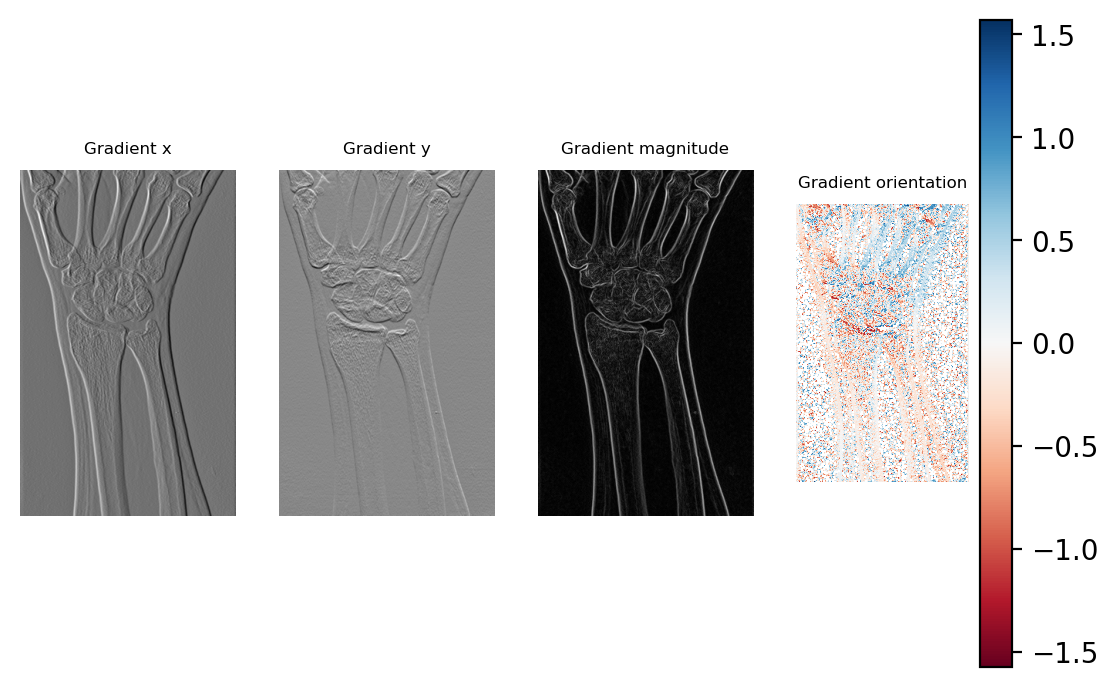

In [13]:
gradient_magnitude = lambda gradient_x, gradient_y: np.sqrt(gradient_x**2 + gradient_y**2)
g_mag = gradient_magnitude(gradient_x, gradient_y)

gradient_angle = lambda gradient_x, gradient_y: np.arctan(gradient_y/gradient_x)
g_angle = gradient_angle(gradient_x, gradient_y)

plt.figure(dpi=200)
plt.subplot(1, 4, 1)
plt.imshow(gradient_x, cmap='gray')
plt.title("Gradient x", fontsize=6)
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(gradient_y, cmap='gray')
plt.title("Gradient y", fontsize=6)
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(g_mag, cmap='gray')
plt.title("Gradient magnitude", fontsize=6)
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(g_angle, cmap='RdBu')
plt.colorbar()
plt.title("Gradient orientation", fontsize=6)
plt.axis('off')
plt.show()